In [11]:
# Get nonlinear power spectra required for computing Delta Sigma with an extended lens redshift
import numpy as np
import pyccl as ccl
%matplotlib inline
import matplotlib.pyplot as plt
import shared_functions_setup as setup
import scipy.integrate

In [12]:
survey = 'LSST_DESI'
if (survey == 'SDSS'):
    import params as pa
elif (survey == 'LSST_DESI'):
    import params_LSST_DESI as pa

In [13]:
p = ccl.Parameters(Omega_c = pa.OmC, Omega_b = pa.OmB, h = (pa.HH0/100.), A_s = pa.A_s, n_s=pa.n_s)
cosmo = ccl.Cosmology(p)

In [14]:
if (survey=='SDSS'):
    #z = np.array([ 0.16      ,  0.17052632,  0.18105263,  0.19157895,  0.20210526, 0.21263158,  0.22315789,  0.23368421,  0.24421053,  0.25473684, 0.26526316,  0.27578947,  0.28631579,  0.29684211,  0.30736842, 0.31789474,  0.32842105,  0.33894737,  0.34947368,  0.36      ])
    z = np.asarray([0.16, 0.16202020202020204, 0.16404040404040404, 0.16606060606060608, 0.16808080808080808, 0.17010101010101011, 0.17212121212121212, 0.17414141414141415, 0.17616161616161616, 0.17818181818181819, 0.1802020202020202, 0.18222222222222223, 0.18424242424242424, 0.18626262626262627, 0.18828282828282827, 0.19030303030303031, 0.19232323232323234, 0.19434343434343435, 0.19636363636363635, 0.19838383838383838, 0.20040404040404042, 0.20242424242424242, 0.20444444444444446, 0.20646464646464646, 0.2084848484848485, 0.2105050505050505, 0.21252525252525253, 0.21454545454545454, 0.21656565656565657, 0.21858585858585861, 0.22060606060606061, 0.22262626262626262, 0.22464646464646465, 0.22666666666666668, 0.22868686868686869, 0.23070707070707069, 0.23272727272727273, 0.23474747474747476, 0.23676767676767677, 0.23878787878787877, 0.2408080808080808, 0.24282828282828284, 0.24484848484848487, 0.24686868686868688, 0.24888888888888888, 0.25090909090909091, 0.25292929292929295, 0.25494949494949493, 0.25696969696969696, 0.25898989898989899, 0.26101010101010103, 0.26303030303030306, 0.26505050505050504, 0.26707070707070707, 0.2690909090909091, 0.27111111111111108, 0.27313131313131311, 0.27515151515151515, 0.27717171717171718, 0.27919191919191921, 0.28121212121212125, 0.28323232323232322, 0.28525252525252526, 0.28727272727272724, 0.28929292929292927, 0.2913131313131313, 0.29333333333333333, 0.29535353535353537, 0.2973737373737374, 0.29939393939393943, 0.30141414141414141, 0.30343434343434345, 0.30545454545454542, 0.30747474747474746, 0.30949494949494949, 0.31151515151515152, 0.31353535353535356, 0.31555555555555559, 0.31757575757575757, 0.3195959595959596, 0.32161616161616158, 0.32363636363636361, 0.32565656565656564, 0.32767676767676768, 0.32969696969696971, 0.33171717171717174, 0.33373737373737378, 0.33575757575757575, 0.33777777777777779, 0.33979797979797977, 0.3418181818181818, 0.34383838383838383, 0.34585858585858587, 0.3478787878787879, 0.34989898989898993, 0.35191919191919191, 0.35393939393939394, 0.35595959595959598, 0.35797979797979795, 0.35999999999999999])
elif (survey=='LSST_DESI'):
    #z = np.asarray([0.025, 0.08552632, 0.14605263, 0.20657895, 0.26710526, 0.32763158, 0.38815789, 0.44868421, 0.50921053, 0.56973684, 0.63026316, 0.69078947, 0.75131579, 0.81184211, 0.87236842, 0.93289474, 0.99342105, 1.05394737, 1.11447368, 1.175])
    z = np.asarray([0.025000000000000001, 0.036616161616161616, 0.048232323232323238, 0.059848484848484852, 0.071464646464646481, 0.083080808080808088, 0.094696969696969696, 0.10631313131313133, 0.11792929292929294, 0.12954545454545457, 0.14116161616161618, 0.15277777777777779, 0.1643939393939394, 0.17601010101010103, 0.18762626262626264, 0.19924242424242428, 0.21085858585858588, 0.22247474747474749, 0.23409090909090913, 0.24570707070707073, 0.2573232323232324, 0.26893939393939398, 0.28055555555555561, 0.29217171717171725, 0.30378787878787883, 0.31540404040404046, 0.3270202020202021, 0.33863636363636374, 0.35025252525252532, 0.36186868686868695, 0.37348484848484859, 0.38510101010101017, 0.3967171717171718, 0.40833333333333344, 0.41994949494949502, 0.43156565656565665, 0.44318181818181829, 0.45479797979797987, 0.4664141414141415, 0.47803030303030314, 0.48964646464646477, 0.5012626262626263, 0.51287878787878793, 0.52449494949494957, 0.5361111111111112, 0.54772727272727284, 0.55934343434343448, 0.57095959595959611, 0.58257575757575764, 0.59419191919191927, 0.60580808080808091, 0.61742424242424254, 0.62904040404040418, 0.64065656565656581, 0.65227272727272745, 0.66388888888888897, 0.67550505050505061, 0.68712121212121224, 0.69873737373737388, 0.71035353535353551, 0.72196969696969715, 0.73358585858585867, 0.74520202020202031, 0.75681818181818195, 0.76843434343434358, 0.78005050505050522, 0.79166666666666685, 0.80328282828282849, 0.81489898989899001, 0.82651515151515165, 0.83813131313131328, 0.84974747474747492, 0.86136363636363655, 0.87297979797979819, 0.88459595959595971, 0.89621212121212135, 0.90782828282828298, 0.91944444444444462, 0.93106060606060626, 0.94267676767676789, 0.95429292929292953, 0.96590909090909105, 0.97752525252525269, 0.98914141414141432, 1.000757575757576, 1.0123737373737376, 1.0239898989898992, 1.0356060606060606, 1.0472222222222223, 1.0588383838383839, 1.0704545454545455, 1.0820707070707072, 1.0936868686868688, 1.1053030303030305, 1.1169191919191921, 1.1285353535353537, 1.1401515151515151, 1.1517676767676768, 1.1633838383838384, 1.175])
    
#z = np.linspace(pa.zLmin, pa.zLmax, 500)

In [15]:
h = (pa.HH0/100.)
k = np.logspace(-6, 5, 40000)
Pk = np.zeros((len(k),len(z)))
for zi in range(0,len(z)):
    Pk[:,zi] = h**3 * ccl.nonlin_matter_power(cosmo, k * h , 1./(1.+z[zi])) # CCL takes units without little h's, but we use little h units.
    save_thing = np.column_stack((k, Pk[:,zi]))
    np.savetxt('./txtfiles/Pk_nonlin_z='+str(z[zi])+'.txt', save_thing)

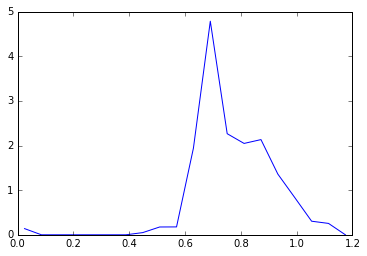

chck norm= 0.992888403357


In [6]:
# Get lens redshift distribution
dndzl = setup.get_dNdzL(z, survey)

plt.figure()
plt.plot(z, dndzl)
plt.show()

print "chck norm=", scipy.integrate.simps(dndzl, z)

# Integrate over lens redshift distribution
Pk_avgZ = np.zeros(len(k))
for ki in range(0,len(k)):
    Pk_avgZ[ki] = scipy.integrate.simps(Pk[ki, :] * dndzl, z)
    
save_Pk = np.column_stack((k, Pk_avgZ))
np.savetxt('./txtfiles/Pk_zavg_'+survey+'.txt', save_Pk)

In [ ]:
plt.figure(figsize=(10,10))
plt.loglog(k, Pk_avgZ)
plt.hold(True)
plt.loglog(k, Pk[:, 0], 'm')
plt.hold(True)
plt.loglog(k, Pk[:, 499], 'g')
plt.show()